<a href="https://colab.research.google.com/github/Poojitha20-B/Deep-Reinforcement-Learning-Internship/blob/main/Day5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import ReduceLROnPlateau
import matplotlib.pyplot as plt
import numpy as np

In [10]:
# Load and preprocess data
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()
train_images = train_images.reshape(60000, 28*28) / 255.0
test_images = test_images.reshape(10000, 28*28) / 255.0


In [11]:
def create_model(use_l2=False):
    reg = l2(1e-4) if use_l2 else None
    model = models.Sequential([
        Dense(1024, activation='relu', input_shape=(28*28,), kernel_regularizer=reg),
        BatchNormalization(),
        Dropout(0.3),

        Dense(512, activation='relu', kernel_regularizer=reg),
        BatchNormalization(),
        Dropout(0.3),

        Dense(256, activation='relu', kernel_regularizer=reg),
        BatchNormalization(),
        Dropout(0.3),

        Dense(128, activation='relu', kernel_regularizer=reg),
        BatchNormalization(),
        Dropout(0.3),

        Dense(10, activation='softmax')
    ])
    return model

In [13]:
# Model A: Baseline (BatchNorm + Dropout only)
model_a = create_model(use_l2=False)
model_a.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

history_a = model_a.fit(train_images, train_labels,
                        epochs=30,
                        batch_size=128,
                        validation_data=(test_images, test_labels),
                        verbose=2)

Epoch 1/30
469/469 - 26s - 56ms/step - accuracy: 0.9081 - loss: 0.3037 - val_accuracy: 0.9622 - val_loss: 0.1189
Epoch 2/30
469/469 - 22s - 46ms/step - accuracy: 0.9578 - loss: 0.1413 - val_accuracy: 0.9717 - val_loss: 0.0868
Epoch 3/30
469/469 - 23s - 49ms/step - accuracy: 0.9673 - loss: 0.1069 - val_accuracy: 0.9757 - val_loss: 0.0805
Epoch 4/30
469/469 - 40s - 85ms/step - accuracy: 0.9720 - loss: 0.0911 - val_accuracy: 0.9752 - val_loss: 0.0851
Epoch 5/30
469/469 - 41s - 87ms/step - accuracy: 0.9757 - loss: 0.0800 - val_accuracy: 0.9770 - val_loss: 0.0773
Epoch 6/30
469/469 - 22s - 47ms/step - accuracy: 0.9779 - loss: 0.0710 - val_accuracy: 0.9800 - val_loss: 0.0687
Epoch 7/30
469/469 - 41s - 88ms/step - accuracy: 0.9806 - loss: 0.0638 - val_accuracy: 0.9831 - val_loss: 0.0599
Epoch 8/30
469/469 - 21s - 46ms/step - accuracy: 0.9819 - loss: 0.0589 - val_accuracy: 0.9815 - val_loss: 0.0625
Epoch 9/30
469/469 - 21s - 45ms/step - accuracy: 0.9819 - loss: 0.0569 - val_accuracy: 0.9817 - 

In [14]:
# Model B: With L2 regularization + Learning rate scheduler
model_b = create_model(use_l2=True)
model_b.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5,
                                 patience=3, verbose=1, min_lr=1e-6)

history_b = model_b.fit(train_images, train_labels,
                        epochs=30,
                        batch_size=128,
                        validation_data=(test_images, test_labels),
                        callbacks=[lr_scheduler],
                        verbose=2)

Epoch 1/30
469/469 - 31s - 65ms/step - accuracy: 0.9092 - loss: 0.4847 - val_accuracy: 0.9609 - val_loss: 0.3056 - learning_rate: 1.0000e-03
Epoch 2/30
469/469 - 24s - 50ms/step - accuracy: 0.9569 - loss: 0.3265 - val_accuracy: 0.9730 - val_loss: 0.2657 - learning_rate: 1.0000e-03
Epoch 3/30
469/469 - 42s - 89ms/step - accuracy: 0.9654 - loss: 0.2902 - val_accuracy: 0.9736 - val_loss: 0.2591 - learning_rate: 1.0000e-03
Epoch 4/30
469/469 - 41s - 87ms/step - accuracy: 0.9686 - loss: 0.2699 - val_accuracy: 0.9725 - val_loss: 0.2564 - learning_rate: 1.0000e-03
Epoch 5/30
469/469 - 41s - 87ms/step - accuracy: 0.9729 - loss: 0.2491 - val_accuracy: 0.9762 - val_loss: 0.2351 - learning_rate: 1.0000e-03
Epoch 6/30
469/469 - 40s - 85ms/step - accuracy: 0.9736 - loss: 0.2396 - val_accuracy: 0.9779 - val_loss: 0.2261 - learning_rate: 1.0000e-03
Epoch 7/30
469/469 - 42s - 90ms/step - accuracy: 0.9746 - loss: 0.2294 - val_accuracy: 0.9747 - val_loss: 0.2258 - learning_rate: 1.0000e-03
Epoch 8/30
46

In [15]:
# Evaluate both models
test_loss_a, test_acc_a = model_a.evaluate(test_images, test_labels, verbose=0)
test_loss_b, test_acc_b = model_b.evaluate(test_images, test_labels, verbose=0)

print(f"Model A Test Accuracy: {test_acc_a:.4f}")
print(f"Model B Test Accuracy: {test_acc_b:.4f}")

Model A Test Accuracy: 0.9833
Model B Test Accuracy: 0.9837


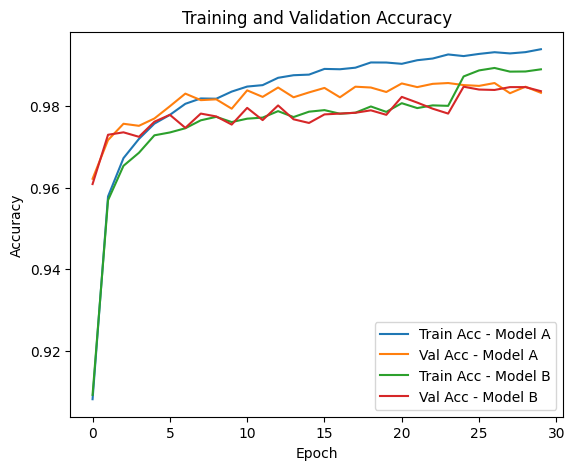

In [17]:
# Plot comparison of accuracy
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
plt.plot(history_a.history['accuracy'], label='Train Acc - Model A')
plt.plot(history_a.history['val_accuracy'], label='Val Acc - Model A')
plt.plot(history_b.history['accuracy'], label='Train Acc - Model B')
plt.plot(history_b.history['val_accuracy'], label='Val Acc - Model B')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()


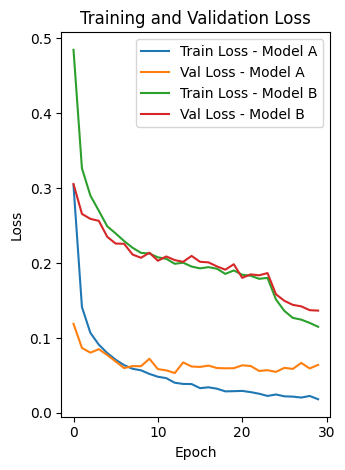

In [19]:
# Plot comparison of loss
plt.subplot(1, 2, 2)
plt.plot(history_a.history['loss'], label='Train Loss - Model A')
plt.plot(history_a.history['val_loss'], label='Val Loss - Model A')
plt.plot(history_b.history['loss'], label='Train Loss - Model B')
plt.plot(history_b.history['val_loss'], label='Val Loss - Model B')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

Model A:
Model A uses Batch Normalization and Dropout for regularization. It learns fast and achieves good accuracy (around 98.3%–98.5%). However, since it doesn’t use L2 regularization or a learning rate scheduler, it slightly overfits and validation loss sometimes increases.

Model B:
Model B uses Batch Normalization, Dropout, L2 regularization, and a learning rate scheduler. These help the model learn more smoothly and avoid overfitting. It gives slightly better accuracy (around 98.5%–98.7%) and more stable validation loss compared to Model A.

Conclusion

Model A gives good accuracy but doesn't use L2 regularization or a learning rate scheduler. Because of that, it might overfit a bit or stop improving early. It learns well, but might not generalize as nicely.

Model B adds L2 regularization and a learning rate scheduler to improve learning. These help the model train more smoothly and avoid overfitting. It usually has better validation curves and slightly higher accuracy than Model A.